## Table of contents 
1. [Importing dataset]()
2. [Explore the data]()
3. [Preprocess the data]()
5. [Build the model]()
   - [set up the layers]()
   - compile the model
6. Train the model
   - feed  the model
   - valuation accuracy
   - Make predictions
   - Verify predictions
   - Use the trained model
    

In [1]:
# Tensorflow and tf.keras
import os
import pandas as pd
import tensorflow as tf
import PIL

import PIL.Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.5.0


In [2]:
from  keras.layers import Dense
#from keras.models import Sequential
tf.keras.Sequential(layers=None, name=None)
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
import warnings
from keras.layers import MaxPooling2D, Flatten, Conv2D, Dropout, Activation


In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

In [4]:
DATADIR = "../Pneumonia/chest_xray"

In [5]:
train_dir = os.path.join(DATADIR, 'train')
val_dir = os.path.join(DATADIR, 'val')
test_dir = os.path.join(DATADIR, 'test')

In [6]:
pneumonia_train_dir = os.path.join(train_dir,'PNEUMONIA')
pneumonia_val_dir = os.path.join(val_dir, 'PNEUMONIA')
pneumonia_test_dir = os.path.join(test_dir, 'PNEUMONIA')

In [7]:
normal_train_dir = os.path.join(train_dir, 'NORMAL')
normal_val_dir = os.path.join(val_dir, 'NORMAL')
normal_test_dir = os.path.join(test_dir, 'NORMAL')

In [8]:
# check the dimensions of the data set
pneumonia_train_images = len(os.listdir(pneumonia_train_dir))
pneumonia_val_images = len(os.listdir(pneumonia_val_dir))
pneumonia_test_images = len(os.listdir(pneumonia_test_dir))

In [9]:
normal_train_images = len(os.listdir(normal_train_dir))
normal_val_images = len(os.listdir(normal_val_dir))
normal_test_images = len(os.listdir(normal_test_dir))

In [10]:
print(f'Total training images: {pneumonia_train_images + normal_train_images}')
print(f'Pneumonia: {pneumonia_train_images}')
print(f'Noraml: {normal_train_images}')
print('\n')
print('*'*30)

print(f'Total validation images: {pneumonia_val_images + normal_val_images}')
print(f'Pneumomian: {pneumonia_val_images}')
print(f'Normal: {normal_val_images}')
print('\n')
print('*'*30)
#print('\n')
print(f'Total test images: {pneumonia_test_images + normal_test_images}')
print(f'Pneumonia test images: {pneumonia_test_images}')
print(f' Nomal test images: {normal_test_images}')

Total training images: 5216
Pneumonia: 3875
Noraml: 1341


******************************
Total validation images: 16
Pneumomian: 8
Normal: 8


******************************
Total test images: 624
Pneumonia test images: 390
 Nomal test images: 234


In [11]:
pneumonia = sum([pneumonia_train_images, pneumonia_val_images, pneumonia_test_images])
normal = sum([normal_train_images, normal_val_images, normal_test_images])

pneumonia + normal

5856

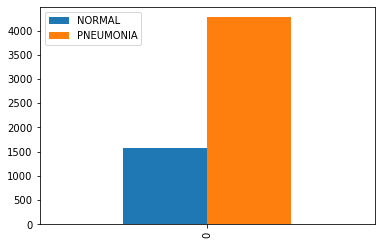

In [12]:
category = ["NORMAL", "PNEUMONIA"]
dic_list = {'NORMAL': normal, "PNEUMONIA": pneumonia}
#fig, ax = plt.subplots( figsize=(10, 6))
df = pd.DataFrame(dic_list, index = np.arange(len(dic_list)-1))
df.head()
df.plot(kind='bar')
#ax.xticks(np.arange(len(category)), category, rot=45)
plt.show()

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255)
            
val_datagen = ImageDataGenerator(
                rescale = 1.0/255)
                

test_datagen = ImageDataGenerator(rescale=1.0/255)
                                    

In [14]:
"""train_generator = train_datagen.flow_from_directory(
                    'chest_xray/chest_xray/train',
                     target_size=(64,64) ,
                     class_mode = 'binary',
                     #color_mode = 'grayscale',
                     batch_size = 32,
                     shuffle = True)
validation_generator = test_datagen.flow_from_directory(
                        'chest_xray/chest_xray/val',
                         target_size=(64,64) ,
                         class_mode = 'binary',
                         #color_mode = 'grayscale',
                         batch_size = 32,
                        shuffle = True)

test_generator = test_datagen.flow_from_directory(
                    'chest_xray/chest_xray/test',
                     target_size=(64,64) ,
                     class_mode = 'binary',
                     #color_mode = 'grayscale',
                     batch_size = 32,
                    shuffle = True)"""





"train_generator = train_datagen.flow_from_directory(\n                    'chest_xray/chest_xray/train',\n                     target_size=(64,64) ,\n                     class_mode = 'binary',\n                     #color_mode = 'grayscale',\n                     batch_size = 32,\n                     shuffle = True)\nvalidation_generator = test_datagen.flow_from_directory(\n                        'chest_xray/chest_xray/val',\n                         target_size=(64,64) ,\n                         class_mode = 'binary',\n                         #color_mode = 'grayscale',\n                         batch_size = 32,\n                        shuffle = True)\n\ntest_generator = test_datagen.flow_from_directory(\n                    'chest_xray/chest_xray/test',\n                     target_size=(64,64) ,\n                     class_mode = 'binary',\n                     #color_mode = 'grayscale',\n                     batch_size = 32,\n                    shuffle = True)"

In [14]:
train_generator = train_datagen.flow_from_directory("chest_xray/chest_xray/train",
                                        target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                        seed = 123,
                                        batch_size=BATCH_SIZE,
                                        class_mode = "binary"
                                       )

val_generator  = test_datagen.flow_from_directory("chest_xray/chest_xray/val",
                                      target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                      seed = 123,
                                      batch_size=16,
                                      class_mode = "binary"
                                     )

test_generator = test_datagen.flow_from_directory("chest_xray/chest_xray/test", 
                                      target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                      seed = 123,
                                      batch_size=BATCH_SIZE,
                                      shuffle = False,
                                      class_mode = "binary"
                                      )

Found 5206 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Show some images after data augmentation

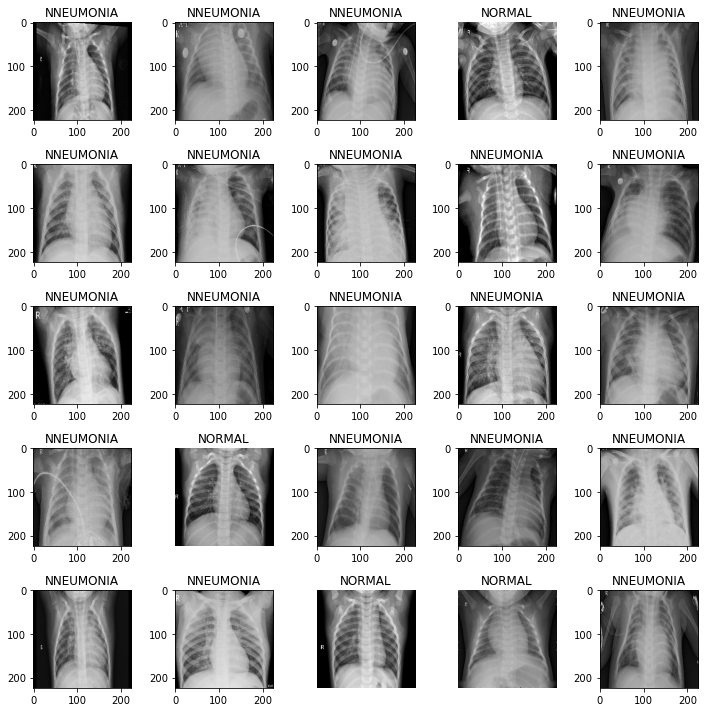

In [15]:
images_batch, label_batch = next(iter(train_generator))

def show_batch(images_batch, label_batch):
    plt.figure(figsize=(10,10))
    for i in range(0, 25):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(images_batch[i])
        if label_batch[i]:
            plt.title("NNEUMONIA")
        else:
            plt.title('NORMAL')
            plt.axis('off')
    plt.tight_layout()
    
show_batch(images_batch, label_batch)

**The shape of the images**

In [16]:
train_generator.image_shape

(224, 224, 3)


**Clasess of the images**

In [17]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

**Define Parameter**

The wieghts are updated in the training with a step size or learning rate. Learning rate is hyperparameter  used in the 
training of neural networks that has small positive value.

In [18]:
EPOCHS = 15
INIT_LR = 1e-3
Batch_sizes= 15
default_image_size = tuple((64, 64))
image_size = 0
width=64
height=64
depth=3


In [20]:
#Label = np.array([Label])

**Building Model Archticture**

In [21]:
#input_shape=(64,64, 3)

In [22]:
def relu(input):
    """ Define relu activation funtion"""
    # Calculate the value for the output of the relue function: output
    output = max(0, input)
    # Retrun the value as calcualted
    return  output

In [19]:
LABELS = ('PNEUMONIA','NORMAL')
IMG_SIZE = 150

def get_data(data_dir):
    data = []
    for label in LABELS:
        path = os.path.join(data_dir, label)
        class_num = LABELS.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)) # Reshaping Images
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [24]:
#print(os.listdir('../Pneumonia/chest_xray/train/PNEUMONIA'))

In [20]:
data1 = len(os.listdir('../Pneumonia/chest_xray/train/NORMAL'))
data2 = len(os.listdir('../Pneumonia/chest_xray/test/NORMAL'))
data3 = len(os.listdir('../Pneumonia/chest_xray/val/NORMAL'))
data4 = len(os.listdir('../Pneumonia/chest_xray/train/PNEUMONIA'))

data5 = len(os.listdir('../Pneumonia/chest_xray/test/PNEUMONIA'))
data6 = len(os.listdir('../Pneumonia/chest_xray/val/PNEUMONIA'))

#chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1257-0001.jpeg'

In [21]:
df = pd.DataFrame({'train':[data1,data4], 'test':[ data2, data5], 'val': [data3,data6]}, columns=['train', 'test', 'val'], index = ['NORMAL', 'PNEUMONIA'])
df

,train,test,val
NORMAL,1341,234,8
PNEUMONIA,3875,390,8


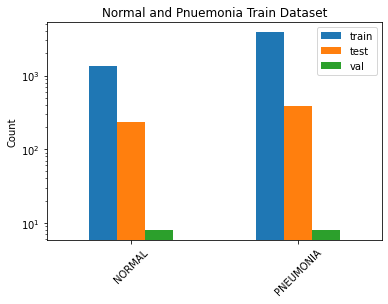

In [22]:

df.plot(kind='bar', rot=45)
plt.title("Normal and Pnuemonia Train Dataset")
plt.ylabel('Count')
plt.legend( loc = 'best')
plt.yscale('log')
plt.show()

In [23]:
input_shape = train_generator.image_shape 

In [24]:
model = tf.keras.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),  activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [25]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
input_shape = (None,224,224,3)

In [27]:
model.build(input_shape)

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 224, 224, 32)      896       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 112, 112, 32)      0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 112, 112, 32)      9248      
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 56, 56, 32)        0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 56, 56, 64)        18496     
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 28, 28, 64)        0         
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 28, 28, 64)       

In [44]:
training = model.fit(
        train_generator,
        validation_data=val_generator,
        steps_per_epoch=40,
        epochs=5,
        validation_steps=2)

Epoch 1/5
40/40 [==============================] - 68s 2s/step - loss: 0.0362 - accuracy: 0.9859 - val_loss: 0.2335 - val_accuracy: 0.9375
Epoch 2/5
40/40 [==============================] - 75s 2s/step - loss: 0.0255 - accuracy: 0.9922
Epoch 3/5
40/40 [==============================] - 68s 2s/step - loss: 0.0390 - accuracy: 0.9867
Epoch 4/5
40/40 [==============================] - 65s 2s/step - loss: 0.0413 - accuracy: 0.9906
Epoch 5/5
40/40 [==============================] - 66s 2s/step - loss: 0.0305 - accuracy: 0.9898


In [35]:
# The testing accuracy score is 93.11% 

scores = model.evaluate(test_generator)
print(scores)

print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))

20/20 [==============================] - 16s 762ms/step - loss: 1.6898 - accuracy: 0.7772
[1.689766764640808, 0.7772436141967773]
Loss of the model: 1.69
Test Accuracy: 77.72%


In [ ]:
#predict_image("./Pneumonia/chest_xray/chest_xray/val/PNEUMONIA/")



[0.9709258079528809, 0.9740853905677795, 0.9668444991111755, 0.9713083505630493, 0.9739862084388733]


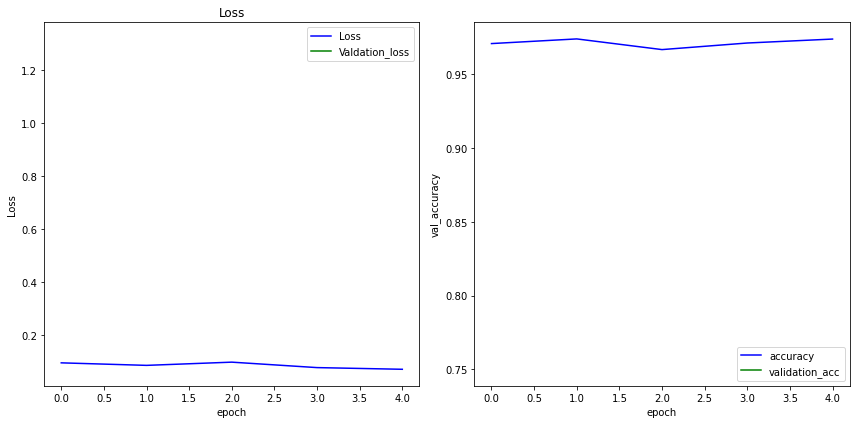

In [37]:
history = training.history
print(history['accuracy'])

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(history['loss'], 'b', history['val_loss'], 'g')
plt.plot(history['val_loss'], label='validation')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title("Loss")
plt.legend(['Loss' , 'Valdation_loss'])


plt.subplot(1,2,2)
plt.plot(history['accuracy'], 'b', history['val_accuracy'], 'g')
plt.plot(history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('val_accuracy')
plt.legend(['accuracy', 'validation_acc'])
plt.tight_layout()


plt.show()



In [46]:
history

{'loss': [0.09607721865177155,
  0.08658818155527115,
  0.09869711846113205,
  0.07816807180643082,
  0.07184138894081116],
 'accuracy': [0.9709258079528809,
  0.9740853905677795,
  0.9668444991111755,
  0.9713083505630493,
  0.9739862084388733],
 'val_loss': [1.316153645515442],
 'val_accuracy': [0.75]}

In [1]:
import math
37e+02

3700.0

In [7]:
b = 6 * 512 * 512 * 3
b

4718592